In [1]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
path = Path("C:/Users/prasad/Downloads/Google Images/")

### Data Gathering 

Collect data from automated [Python Script](https://pypi.org/project/google_images_download/)<br>
Following code will download images along with different folders, specifying its given names<br>
(Images will be saved in Downloads)

In [ ]:
from google_images_download import google_images_download  

response = google_images_download.googleimagesdownload()  

#Provide list for downloading images
data_list = [ 'Niagara Falls', 'Pyramids Of Giza - Egypt', 'Roman Colosseum - Rome',
 'Santorini', 'Statue Of Liberty - NYC', 'Stonehenge', 'Taj Mahal - India', 'The Blue Grotto', 'Venezuela Angel Falls',
        'Antarctica', 'Burj Khalifa - UAE', 'Chich-n Itz - Mexico', 'Christ the Reedemer Statue', 'Eiffel Tower - Paris', 
             'Giant-s Causeway', 'Great Wall Of China - China', 'Himalaya - India', 'Machu Pichu']
  
def downloadimages(query): 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":100, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio": "panoramic"} 
    try: 
        response.download(arguments)  
    except: 
        pass

for query in data_list: 
    downloadimages(query)

In [2]:
data_list = os.listdir(path)
data_list

['Antarctica',
 'Burj Khalifa - UAE',
 'Chich-n Itz - Mexico',
 'Christ the Reedemer Statue',
 'Eiffel Tower - Paris',
 'Giant-s Causeway',
 'Great Wall Of China - China',
 'Himalaya - India',
 'Machu Pichu',
 'Niagara Falls',
 'Pyramids Of Giza - Egypt',
 'Roman Colosseum - Rome',
 'Santorini',
 'Statue Of Liberty - NYC',
 'Stonehenge',
 'Taj Mahal - India',
 'The Blue Grotto',
 'Venezuela Angel Falls']

In [3]:
data_list.sort()
print(data_list)

['Antarctica', 'Burj Khalifa - UAE', 'Chich-n Itz - Mexico', 'Christ the Reedemer Statue', 'Eiffel Tower - Paris', 'Giant-s Causeway', 'Great Wall Of China - China', 'Himalaya - India', 'Machu Pichu', 'Niagara Falls', 'Pyramids Of Giza - Egypt', 'Roman Colosseum - Rome', 'Santorini', 'Statue Of Liberty - NYC', 'Stonehenge', 'Taj Mahal - India', 'The Blue Grotto', 'Venezuela Angel Falls']


In [4]:
import cv2
import glob
import tensorflow as tf
from scipy.misc import *
from tqdm import tqdm
from PIL import Image
from numpy import*
data=[]

### RGB to Grayscale Array

Convert all images into gray scale array values 

In [5]:
for category in data_list:
    path_ = os.path.join(path,category)
    for img in tqdm(os.listdir(path_)):  
        img_array = cv2.imread(os.path.join(path_,img) ,cv2.IMREAD_GRAYSCALE)
        data.append([img_array,category])

100%|████████████████████████████████████████████████████████████████████████████████| 232/232 [00:08<00:00, 26.76it/s]


Now data is in same repetitive pattern model will mislead its learning due this, hence shuffle data to avoid any circumstance

In [12]:
import random

random.shuffle(data)

Seperating feature and label 

In [7]:
features = []
labels = []

for feat,label in data:
    features.append(feat)
    labels.append(label)

print(labels) 


['Great Wall Of China - China', 'Giant-s Causeway', 'Antarctica', 'Pyramids Of Giza - Egypt', 'Chich-n Itz - Mexico', 'Great Wall Of China - China', 'Eiffel Tower - Paris', 'Santorini', 'Giant-s Causeway', 'Eiffel Tower - Paris', 'Taj Mahal - India', 'Taj Mahal - India', 'Antarctica', 'Burj Khalifa - UAE', 'Taj Mahal - India', 'Christ the Reedemer Statue', 'Himalaya - India', 'Stonehenge', 'Venezuela Angel Falls', 'Roman Colosseum - Rome', 'Roman Colosseum - Rome', 'Venezuela Angel Falls', 'Eiffel Tower - Paris', 'Giant-s Causeway', 'Burj Khalifa - UAE', 'The Blue Grotto', 'Pyramids Of Giza - Egypt', 'Christ the Reedemer Statue', 'The Blue Grotto', 'Antarctica', 'Eiffel Tower - Paris', 'Burj Khalifa - UAE', 'Antarctica', 'Antarctica', 'Taj Mahal - India', 'Christ the Reedemer Statue', 'Santorini', 'Stonehenge', 'Venezuela Angel Falls', 'Roman Colosseum - Rome', 'Antarctica', 'Great Wall Of China - China', 'Niagara Falls', 'Christ the Reedemer Statue', 'Chich-n Itz - Mexico', 'Christ th

### Encoding Categorical Data

Using label encoder to convert categorical data into numerical 

In [8]:
from sklearn import preprocessing 
label=[]
label = np.asarray(labels)
labels=[] 
label_encoder = preprocessing.LabelEncoder() 
labels= label_encoder.fit_transform(label)

print(labels[:30])

[ 6  5  0 10  2  6  4 12  5  4 15 15  0  1 15  3  7 14 17 11 11 17  4  5
  1 16 10  3 16  0]


### Resizing

Image size may vary so resize image into 250 X 250 

In [9]:
img_array=[]
i=[]
width = 250
height = 250
for i in features:
    resized = cv2.resize(i,(width,height), interpolation=cv2.INTER_CUBIC)
    img_array.append(resized)

### Data Visualisation

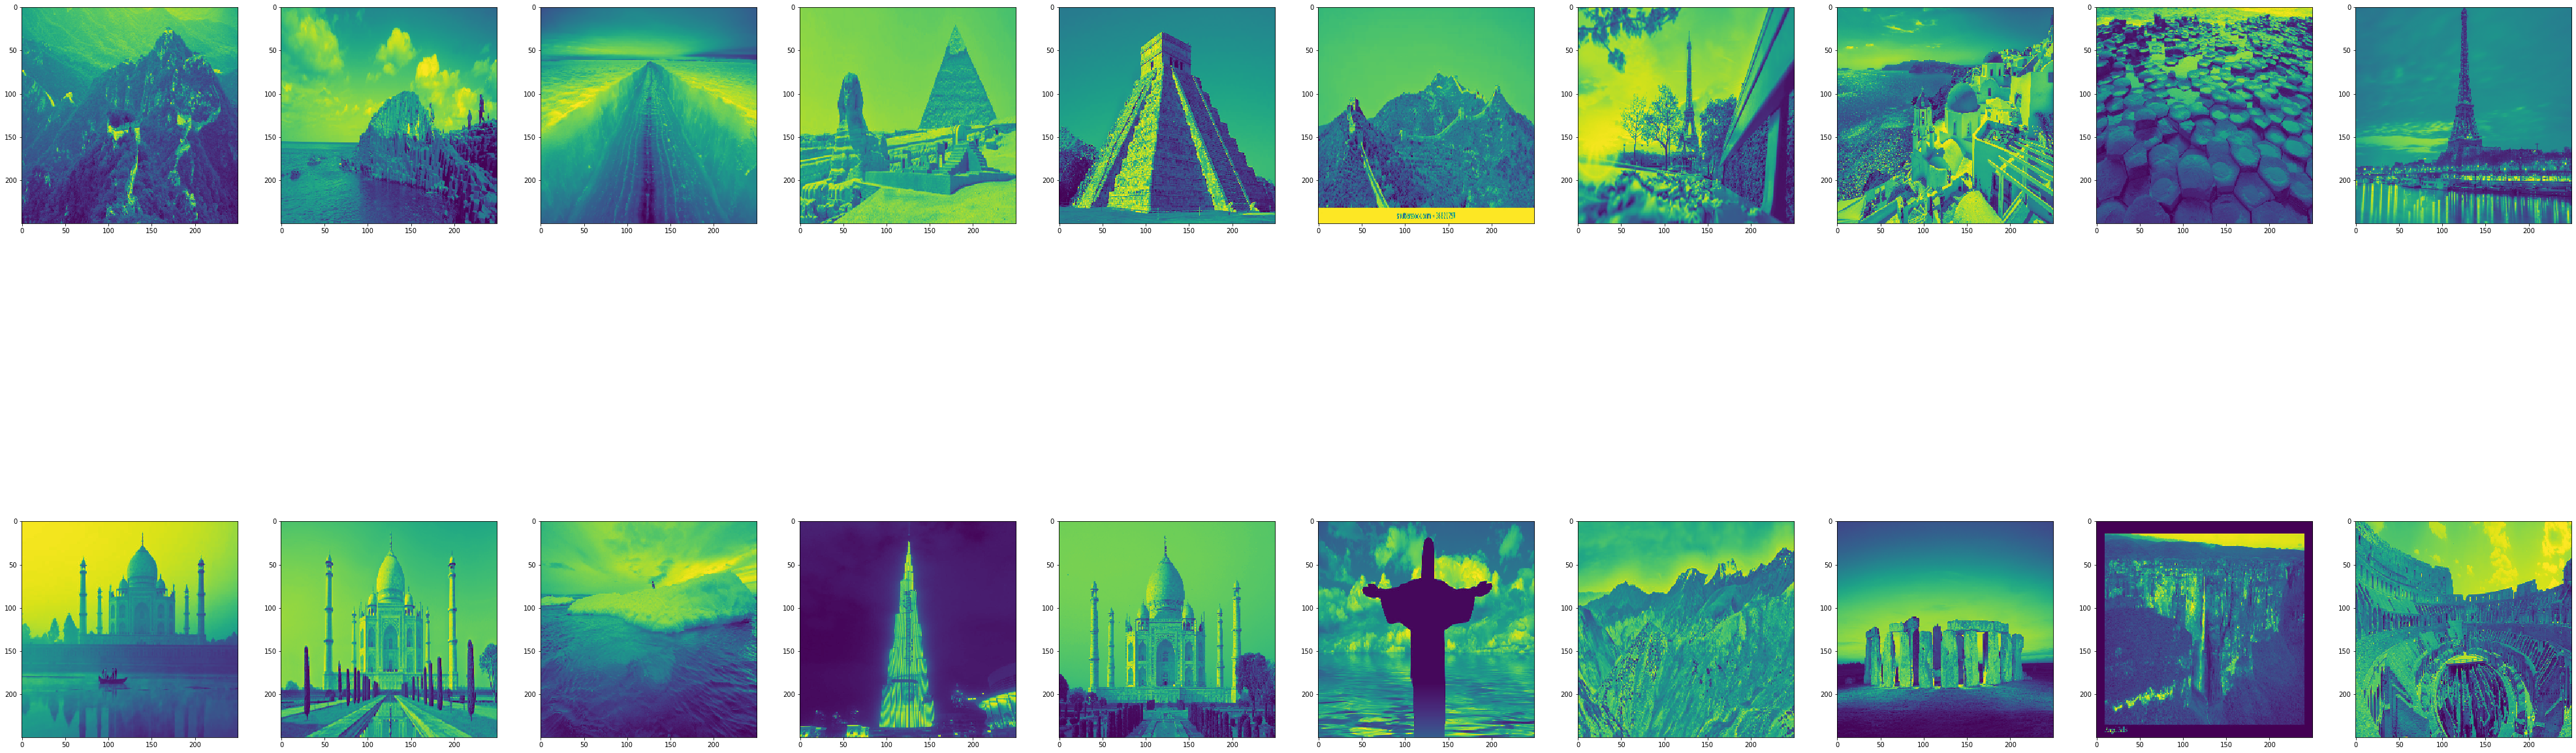

In [10]:
plt.figure(figsize=(70,70))
for i in range(20):  
    plt.subplot(5, 10, i+1)
    plt.imshow(img_array[i])
plt.show()

### Reshaping

In [11]:
img_array = np.asarray(img_array)
img_array = img_array.reshape(len(img_array),250,250,1)

### Pickling

Let's save the structure of model till now in pickle

In [11]:
import pickle
x = open("feat.pickle","wb")
pickle.dump(img_array, x)
x.close()

Y = open("label.pickle","wb")
pickle.dump(labels, Y)
Y.close()

Open dumped pickle file

In [12]:
import pickle
pickle_in = open("feat.pickle","rb")
feature = pickle.load(pickle_in)

pickle_in = open("label.pickle","rb")
label = pickle.load(pickle_in)

[Rescale images](https://datascience.stackexchange.com/questions/29958/when-inputting-image-rgb-values-to-mlp-should-i-divide-by-255)